In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


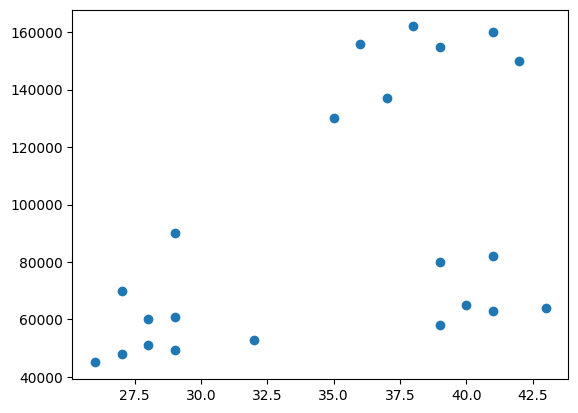

In [63]:
plt.scatter(df['Age'], df['Income($)'])

In [64]:
from sklearn.cluster import KMeans

In [65]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [66]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [67]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


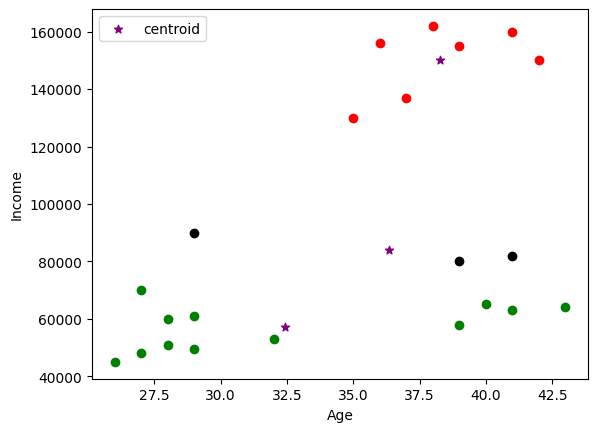

In [68]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

due to scale difference in features data is not clustered correctly


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [70]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [71]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [72]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [73]:
df['Clusters'] = y_predicted
df

,Name,Age,Income($),cluster,Clusters
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,2
5,Gautam,0.764706,0.940171,1,2
6,David,0.882353,0.982906,1,2
7,Andrea,0.705882,1.000000,1,2
8,Brad,0.588235,0.948718,1,2
9,Angelina,0.529412,0.726496,1,2


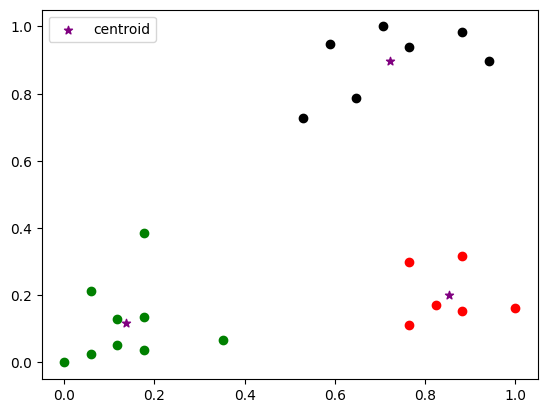

In [75]:
df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.legend()

In [78]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

sse


[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.38815291664787444,
 0.26640301246684156,
 0.2407627035421819,
 0.1685851223602976,
 0.15935040915078186,
 0.11790807312684992]

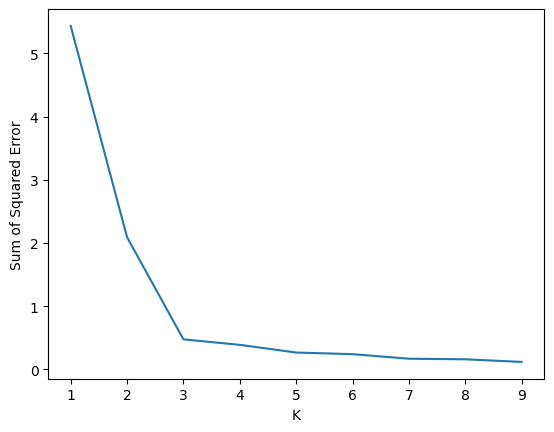

In [79]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)